Para este terceiro trabalho, são realizados processos para calcular o comprimento de uma respectiva curva. A curva a ser analizada em questão é representada pela função implícita

 $$(x^2 + y^2 - 0.3y)^2 - 2a^2(x^2 - y^2 + 0.1x) + a^4 = b^4 ,$$

sendo $a = 0.5$ e $b = 0.6$, além de $x\in[-0.4;0.58]$ e $y>0$

No entanto, é necessário realizar outros processos antes de calcular o comprimento da curva analisada.

Primeiramente, para melhor análise do comportamento da curva, foi feito a plotagem da imagem completa. Como a função é implicita, foi feito a separação desta função como a subtração de outras duas, sendo elas:

$$f(x,y)=(x^2 + y^2 - 0.3y)^2$$

$$g(x,y)=b^4 + 2a^2(x^2 - y^2 + 0.1x) - a^4$$

$$h(x,y) = f(x,y) - g(x,y)$$

Logo, é possível realizar a plotagem com esta relação.

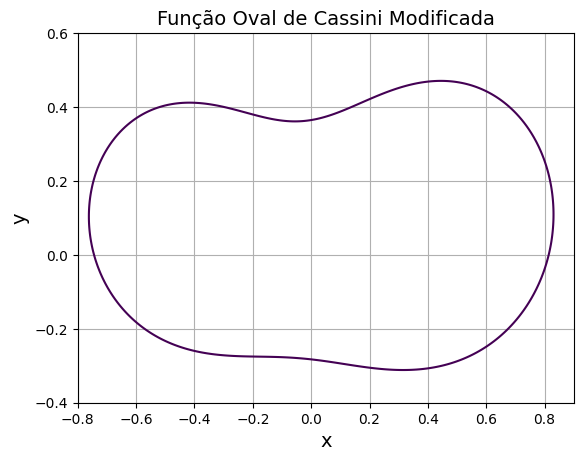

In [6]:
import numpy as np
import matplotlib.pyplot as plt

a = 0.5
b = 0.6

xrange = np.linspace(-0.8,0.9,200)   # Geração de 200 pontos entre -0.8 e 0.9 para plotagem do eixo X
yrange = np.linspace(-0.4, 0.6, 200)    # Geração de 200 pontos entre -0.4 e 0.6 para plotagem do eixo Y
x, y = np.meshgrid(xrange, yrange)   # Geração de coordenadas para plotar a imagem completa

def f(x,y):      # Definição da função f(x,y)
  return (x**2 + y**2 - 0.3*y)**2

def g(x,y):     # Definição da função g(x,y)
  return b**4 + 2*(a**2)*(x**2 - y**2 + 0.1*x) - a**4

def h(x,y):    # y^4 - 0.6*y^3 + (0.59 + 2*x^2)*y^2 + (-0.6*x^2)*y + (x^4 - 0.5*x^2 - 0.05*x - 0.0671)
  return f(x,y) - g(x,y)

fig, ax = plt.subplots()    # Define que o gráfico terá um subplot
plt.contour(x, y, h(x,y), [0])   # Plota a função h(x,y)
ax.set_xlabel('x',fontsize=14)   # Legenda do eixo X
ax.set_ylabel('y',fontsize=14)   # Legenda do eixo Y
ax.set_title('Função Oval de Cassini Modificada',fontsize=14) # Título
ax.grid(True)    # Coloca o grid de linhas
plt.show()   # Gera o gráfico

Com a imagem plotada, reduzimos os limites do gráfico até o solicitado pelo exercício. Portanto, temos:

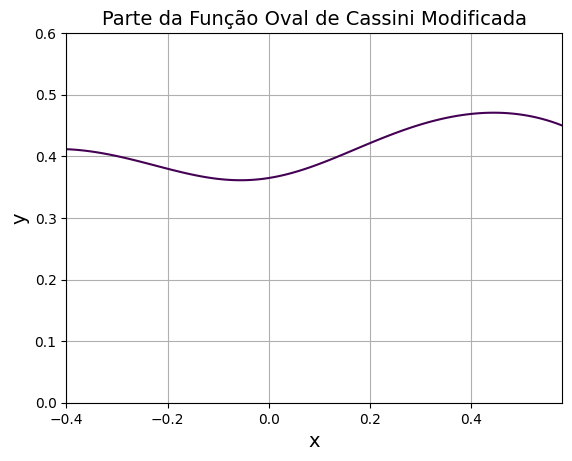

In [3]:
xrange = np.linspace(-0.4,0.58,200)   # Geração de 200 pontos entre -0.4 e 0.58 para plotagem do eixo X
yrange = np.linspace(0, 0.6, 200)     # Geração de 200 pontos entre 0 e 0.6 para plotagem do eixo Y
x, y = np.meshgrid(xrange, yrange)    # Geração de coordenadas para plotar a imagem completa

fig, ax = plt.subplots()    #Define que o gráfico terá um subplot
plt.contour(x, y, h(x,y), [0])   # Plota a função h(x,y)
ax.set_xlabel('x',fontsize=14)   #Legenda do eixo X
ax.set_ylabel('y',fontsize=14)   #Legenda do eixo Y
ax.set_title('Parte da Função Oval de Cassini Modificada',fontsize=14) #Título
ax.grid(True)    #Coloca o grid de linhas
plt.show()   #Gera o gráfico

In [4]:
if 'y' in globals():  # Condição para analisar se há variável y
  del y     # Deleta os valores de y para ser usado como variável
if 'x' in globals():
  del x

x0 = [np.float64(min(xrange)),np.float64((min(xrange)+max(xrange)))/2, np.float64(max(xrange))]  # Valores de X para serem calculados os valores de f(x)
y0 = [1, 1, 1]   # Chutes iniciais para o método de Newton
res = []

for i in range(len(x0)):
  var = np.poly1d([1, -0.6, (0.59 + 2*x0[i]**2), (-0.6*x0[i]**2), (x0[i]**4 - 0.5*x0[i]**2 - 0.05*x0[i] - 0.0671)], variable='y')
  der = np.polyder(var)

  for j in range(30):    # Loop para considerar a precisão
    z = np.float64(y0[i] - (h(x0[i],y0[i])/der(y0[i])))   # Cálculo do método de Newton
    y0[i] = z     # Substituição da variável para continuar o método

  res.append(z)

  print(f'\nO valor de Y para X = {x0[i] :.2f} é: {res[i]}')    # Print dos valores calculados
res.clear()


O valor de Y para X = -0.40 é: 0.41157396895541304

O valor de Y para X = 0.09 é: 0.3846947026904141

O valor de Y para X = 0.58 é: 0.4499088202756563


In [5]:
for i in range(len(x0)):
  var = np.poly1d([1, -0.6, (0.59 + 2*x0[i]**2), (-0.6*x0[i]**2), (x0[i]**4 - 0.5*x0[i]**2 - 0.05*x0[i] - 0.0671)], variable='y')
  der = np.polyder(var)
  der2 = np.polyder(var,2)

  for j in range(30):    # Loop para considerar a precisão
    z = np.float64(y0[i] - (der(y0[i])/der2(y0[i])))   # Cálculo do método de Newton
    y0[i] = z     # Substituição da variável para continuar o método

  res.append(z)
  print(f'\nTemos que o valor da derivada para X={x0[i] :.2f} é {res[i]}')


Temos que o valor da derivada para X=-0.40 é 0.055409872302490795

Temos que o valor da derivada para X=0.09 é 0.004032503848173658

Temos que o valor da derivada para X=0.58 é 0.084008485763954
